# AutoEncoder With Keras

### Topics:
1. Download Dataset From Kaggle
2. Install and Load Library
3. About Dataset
4. Data Processing
5. Autoencoder Architecture
6. Train Model

## Download Dataset From Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
!kaggle datasets download -d theblackmamba31/landscape-image-colorization

Dataset URL: https://www.kaggle.com/datasets/theblackmamba31/landscape-image-colorization
License(s): unknown
 94%|█████████████████████████████████████▋  | 181M/192M [00:02<00:00, 88.6MB/s]
100%|████████████████████████████████████████| 192M/192M [00:02<00:00, 72.4MB/s]


In [ ]:
# ! unzip /teamspace/studios/this_studio/landscape-image-colorization.zip

## Install and Load Library

In [ ]:
! pip install visualkeras -q
! pip install opencv-python -q
! pip install tensorflow -q
! pip install keras -q

In [ ]:
# ! pip install tensorflow-gpu

In [ ]:
!nvidia-smi


Fri Nov 22 10:26:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.216.03             Driver Version: 535.216.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A10G                    Off | 00000000:00:1E.0 Off |                    0 |
|  0%   21C    P0              55W / 300W |    254MiB / 23028MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip uninstall tensorflow -y
!pip uninstall keras -y
!pip install tensorflow==2.17.0
# !pip install keras
# !pip install tensorflow-gpu

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.6.0
Uninstalling keras-3.6.0:
  Successfully uninstalled keras-3.6.0
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.python.client import device_lib


import tensorflow as tf
from tensorflow.keras.layers import (
    MaxPool2D, Conv2D, Conv2DTranspose, Input, Dropout, Activation,
    BatchNormalization, LeakyReLU, ReLU, concatenate
)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
import re
import visualkeras

2024-11-22 10:33:49.998307: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-22 10:33:50.047402: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-22 10:33:50.061358: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 10:33:50.153815: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-22 10:33:51.144317: W tensorflow/compiler/tf2

In [ ]:
device_lib.list_local_devices()


I0000 00:00:1732271640.105947   13254 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732271640.148313   13254 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732271640.148605   13254 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732271640.295982   13254 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16032579003661252939
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 21950365696
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11319840056470651965
 physical_device_desc: "device: 0, name: NVIDIA A10G, pci bus id: 0000:00:1e.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


I0000 00:00:1732271646.977110   13254 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732271646.977419   13254 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732271646.977624   13254 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## About Dataset

#### Landscape Image dataset

This dataset consist of street,buildings,mountains,glaciers , trees etc and their corresponding grayscale image in two different folder.

The main objective of creating this dataset is to create autoencoder network that can colorized grayscale landscape images

## Data Processing

In [ ]:
data_dir = '/teamspace/studios/this_studio/landscape Images'

data_color = data_dir + '/color/'
data_gray = data_dir + '/gray/'

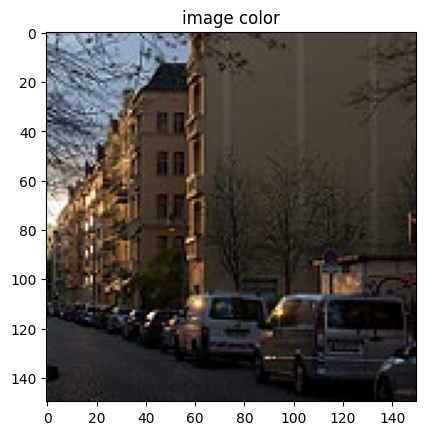

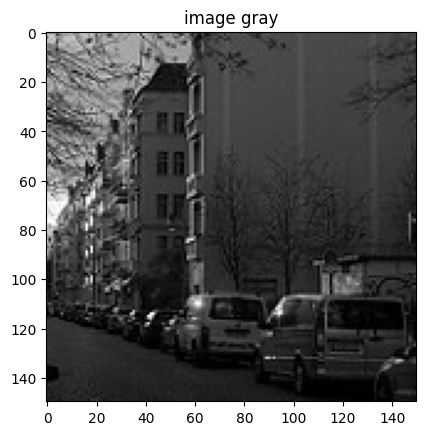

In [ ]:
img_color = cv2.imread(data_color + '/0.jpg')
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.title('image color')
plt.imshow(img_color)
plt.show()

img_gray = cv2.imread(data_gray + '/0.jpg')
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
plt.title('image gray')
plt.imshow(img_gray)

In [ ]:
img_color.shape, img_gray.shape

((150, 150, 3), (150, 150, 3))

In [ ]:
# dataset len
print(len(os.listdir(data_color)))
len(os.listdir(data_gray))

7129


7129

In [ ]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

SIZE = 160
color_img = []
path = data_color
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '7000.jpg':
        break
    else:
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        color_img.append(img_to_array(img))


gray_img = []
path = data_gray
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
     if i == '7000.jpg':
        break
     else:
        img = cv2.imread(path + '/'+i,1)

        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        gray_img.append(img_to_array(img))

 98%|█████████▊| 7000/7129 [00:03<00:00, 2324.72it/s]


In [ ]:
def plot_images(color,grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)

    plt.show()

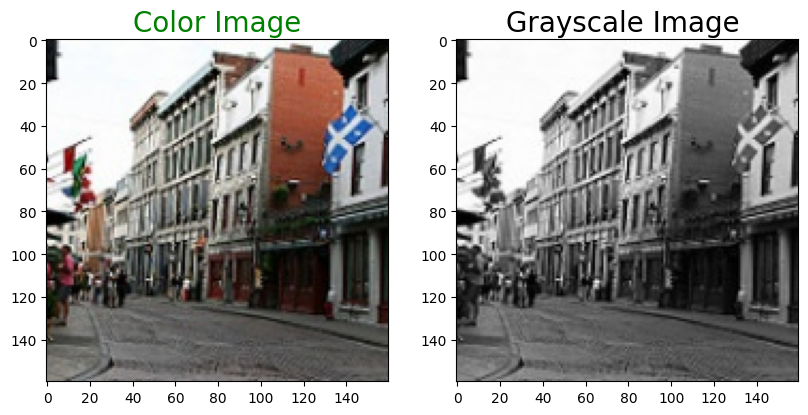

In [ ]:
for i in range(3,10):
     plot_images(color_img[i],gray_img[i])

In [ ]:
train_gray_image = gray_img[:6500]
train_color_image = color_img[:6500]

test_gray_image = gray_img[6500:]
test_color_image = color_img[6500:]
# reshaping
train_g = np.reshape(train_gray_image,(len(train_gray_image),SIZE,SIZE,3))
train_c = np.reshape(train_color_image, (len(train_color_image),SIZE,SIZE,3))
print('Train color image shape:',train_c.shape)


test_gray_image = np.reshape(test_gray_image,(len(test_gray_image),SIZE,SIZE,3))
test_color_image = np.reshape(test_color_image, (len(test_color_image),SIZE,SIZE,3))
print('Test color image shape',test_color_image.shape)

Train color image shape: (6500, 160, 160, 3)
Test color image shape (500, 160, 160, 3)


## Autoencoder Architecture

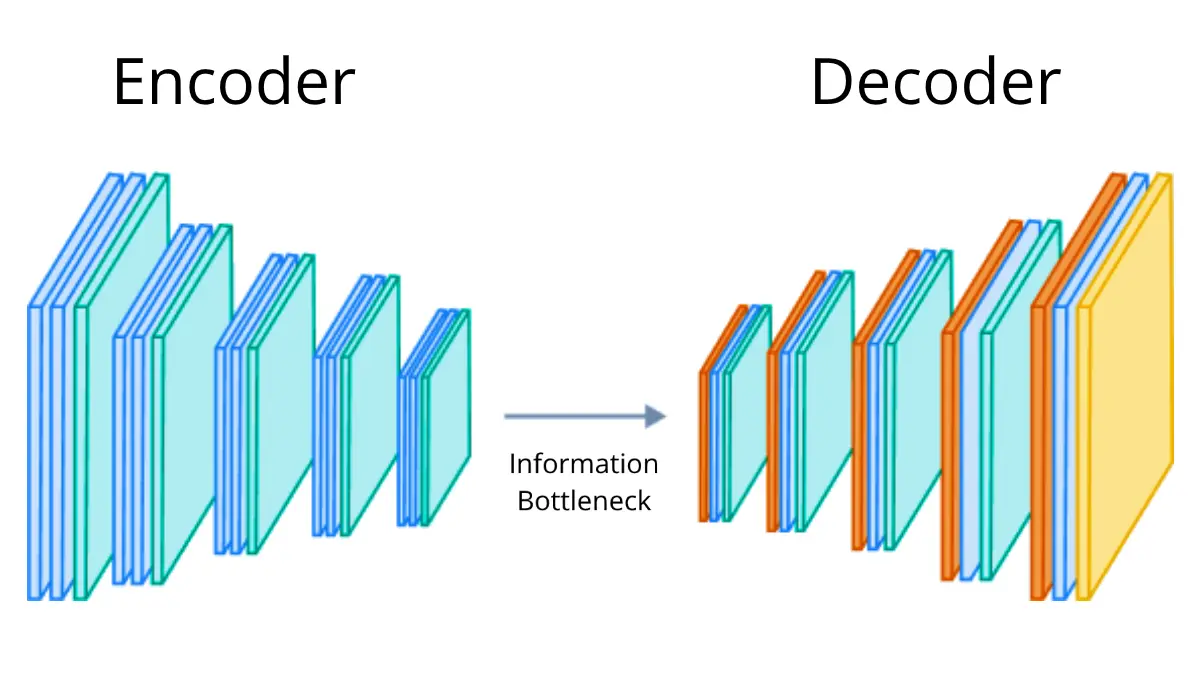

In [ ]:
def encode(filter, kernel_size, strides=1, t=False):
  encoder = Sequential()
  encoder.add(Conv2D(filter, kernel_size, strides=strides, padding='same'))
  encoder.add(BatchNormalization(axis=3))
  if not t:
    encoder.add(ReLU())
  # encoder.add(MaxPool2D(pool_size=(2, 2), strides=2))
  return encoder

In [ ]:
def decode(filter, kernel_size, strides=1, t=False):
  decoder = Sequential()
  decoder.add(Conv2DTranspose(filter, kernel_size, strides=strides, padding='same'))
  decoder.add(BatchNormalization(axis=3))
  if not t:
    decoder.add(ReLU())
  # decoder.add(MaxPool2D(pool_size=(2, 2), strides=2))
  return decoder

In [ ]:
input = Input(shape=(160, 160, 3))

e1 = encode(64, (3, 3))(input)
e2 = encode(64, (3, 3), t=True)(e1)
e2 = e2 + e1
e2 = ReLU()(e2)
e3 = encode(64, (3, 3), 2)(e2)
e4 = encode(128, (3, 3))(e3)
e5 = encode(128, (3, 3), t=True)(e4)
e5 = e5 + e4
e5 = ReLU()(e5)
e6 = encode(128, (3, 3), 2)(e5)
e7 = encode(256, (3, 3))(e6)
e8 = encode(256, (3, 3), t=True)(e7)
e7 = e7 + e8
e7 = ReLU()(e7)
e9 = encode(256, (3, 3), 2)(e8)
e10 = encode(512, (3, 3))(e9)
e11 = encode(512, (3, 3), t=True)(e10)
e11 = e11 + e10
e11 = ReLU()(e11)
e12 = encode(512, (3, 3), 2)(e11)

b1 = encode(1024, (3, 3))(e12)

d1 = decode(512, (3, 3))(b1)
d2 = decode(512, (3, 3), t=True)(d1)
d2 = d2 + d1
d2 = ReLU()(d2)
d2 = concatenate([d2, e12])
d3 = decode(512, (3, 3), 2)(d2)
d4 = decode(256, (3, 3))(d3)
d5 = decode(256, (3, 3), t=True)(d4)
d5 = d5 + d4
d5 = ReLU()(d5)
d5 = concatenate([d5, e9])
d6 = decode(256, (3, 3), 2)(d5)
d7 = decode(128, (3, 3))(d6)
d8 = decode(128, (3, 3), t=True)(d7)
d8 = d8 + d7
d8 = ReLU()(d8)
d8 = concatenate([d8, e7])
d9 = decode(128, (3, 3), 2)(d8)
d10 = decode(64, (3, 3))(d9)
d11 = decode(64, (3, 3), t=True)(d10)
d11 = d11 + d10
d11 = ReLU()(d11)
d11 = concatenate([d11, e3])
d12 = decode(64, (3, 3), 2)(d11)




output = Conv2D(3, (2, 2), activation='sigmoid', padding='same')(d12)


model = Model(inputs=input, outputs=output)

In [ ]:
model.summary()

Model: "functional_77"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_52      │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_50       │ (None, 160, 160,  │      2,048 │ input_layer_52[0… │
│ (Sequential)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_51       │ (None, 160, 160,  │     37,184 │ sequential_50[0]… │
│ (Sequential)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 160, 160,  │          0 │ sequential_51[0]… │
│                     │ 64)               │            │ sequential_50[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 160, 160,  │          0 │ add_8[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_52       │ (None, 80, 80,    │     37,184 │ re_lu_1[0][0]     │
│ (Sequential)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_53       │ (None, 80, 80,    │     74,368 │ sequential_52[0]… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_54       │ (None, 80, 80,    │    148,096 │ sequential_53[0]… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 80, 80,    │          0 │ sequential_54[0]… │
│                     │ 128)              │            │ sequential_53[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_4 (ReLU)      │ (None, 80, 80,    │          0 │ add_9[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_55       │ (None, 40, 40,    │    148,096 │ re_lu_4[0][0]     │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_56       │ (None, 40, 40,    │    296,192 │ sequential_55[0]… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_57       │ (None, 40, 40,    │    591,104 │ sequential_56[0]… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_58       │ (None, 20, 20,    │    591,104 │ sequential_57[0]… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_59       │ (None, 20, 20,    │  1,182,208 │ sequential_58[0]… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_60       │ (None, 20, 20,    │  2,361,856 │ sequential_59[0]… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 20, 20,    │          0 │ sequential_60[0]

 Total params: 28,384,835 (108.28 MB)

 Trainable params: 28,371,267 (108.23 MB)

 Non-trainable params: 13,568 (53.00 KB)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


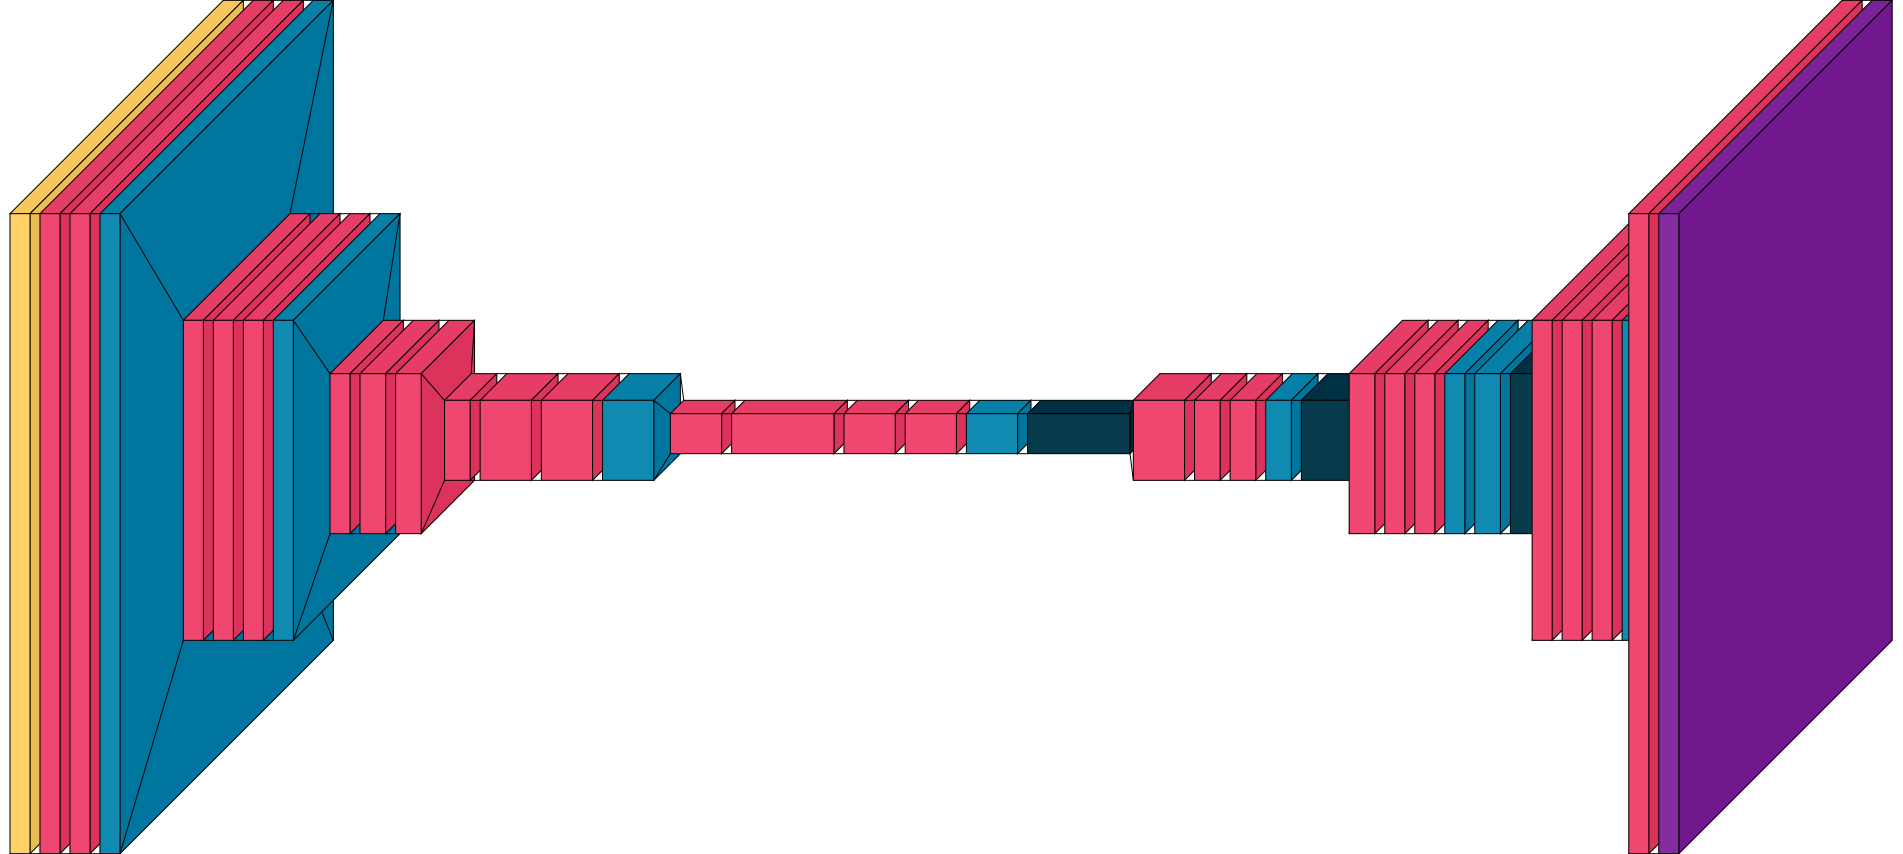

In [ ]:
visualkeras.layered_view(model)

## Train Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['accuracy', 'mae']
)


In [ ]:
# early_stoping = EarlyStopping(monitor='val_loss',patience= 10,restore_best_weights=True,verbose=1)


In [ ]:
model.fit(
    train_g,
    train_c,
    epochs = 25,
    batch_size = 55,
    # callbacks = [early_stoping],
)

Epoch 1/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 343ms/step - accuracy: 0.4181 - loss: 0.0884 - mae: 0.0884
Epoch 2/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.4820 - loss: 0.0542 - mae: 0.0542
Epoch 3/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.4940 - loss: 0.0530 - mae: 0.0530
Epoch 4/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.5136 - loss: 0.0497 - mae: 0.0497
Epoch 5/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.5364 - loss: 0.0495 - mae: 0.0495
Epoch 6/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.5815 - loss: 0.0465 - mae: 0.0465
Epoch 12/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.5856 - loss: 0.0462 - mae: 0.0462
Epoch 13/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.5872 - loss: 0.0477 - mae: 0.0477
Epoch 14/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.5903 - loss: 0.0463 - mae: 0.0463
Epoch 15/25
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.

In [ ]:
model.evaluate(test_gray_image,test_color_image)


15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6101 - loss: 0.0451 - mae: 0.0451

E0000 00:00:1732273986.741608   14749 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732273986.908109   14749 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 357ms/step - accuracy: 0.6101 - loss: 0.0450 - mae: 0.0450


[0.044738661497831345, 0.6100460290908813, 0.044738661497831345]

E0000 00:00:1732273996.181442   14746 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732273996.340426   14746 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


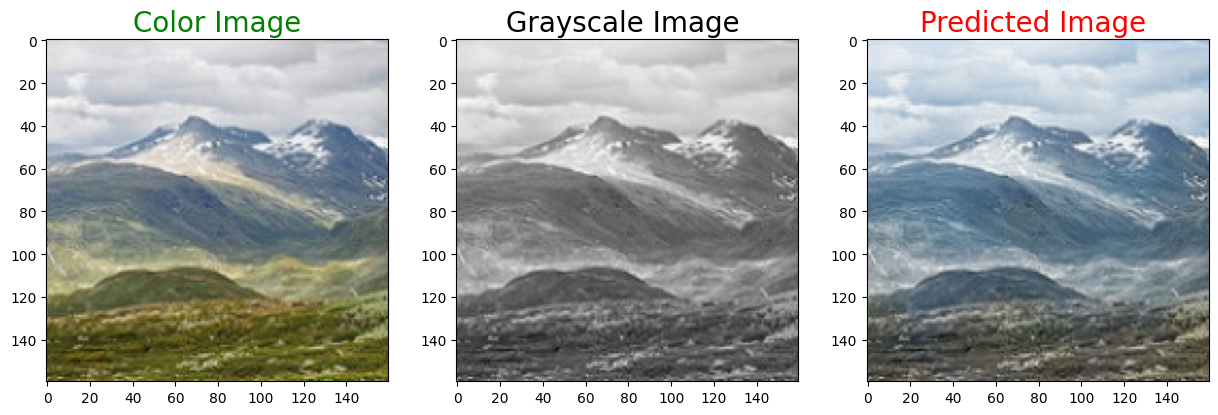

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


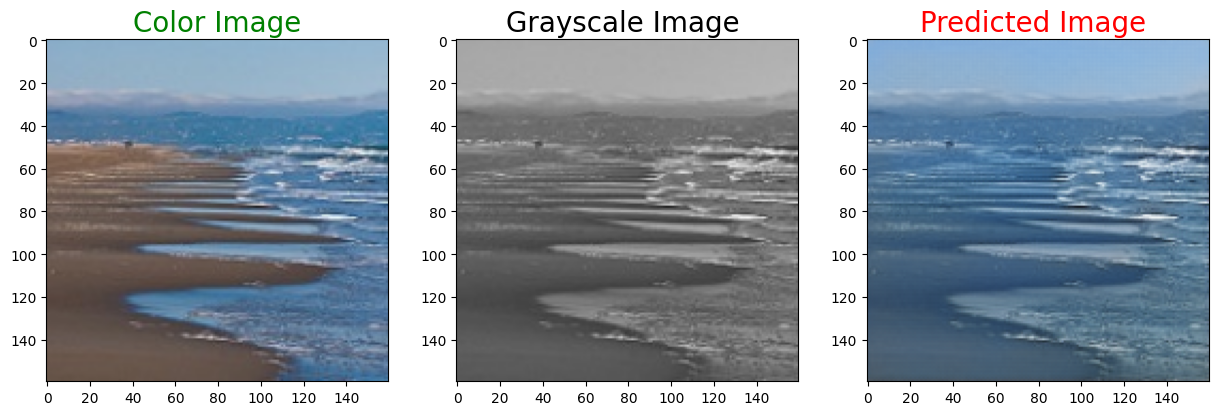

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


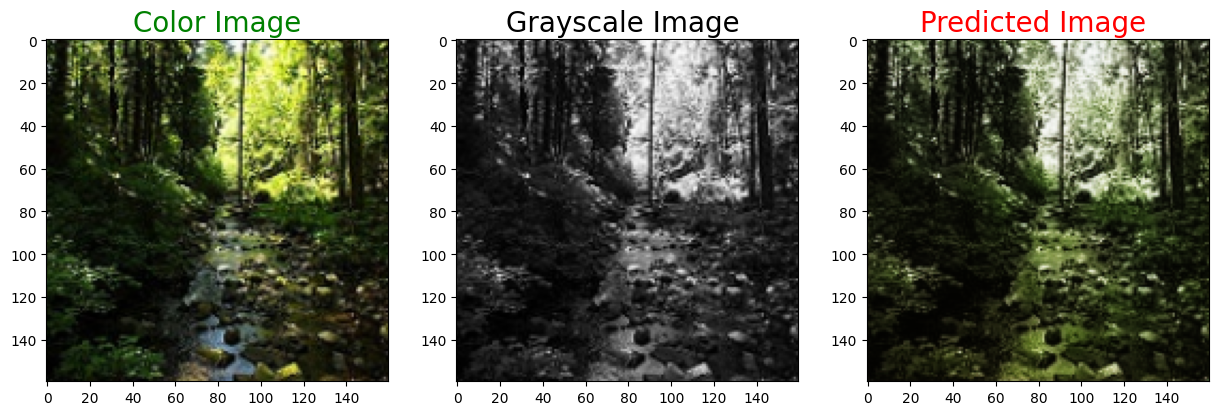

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


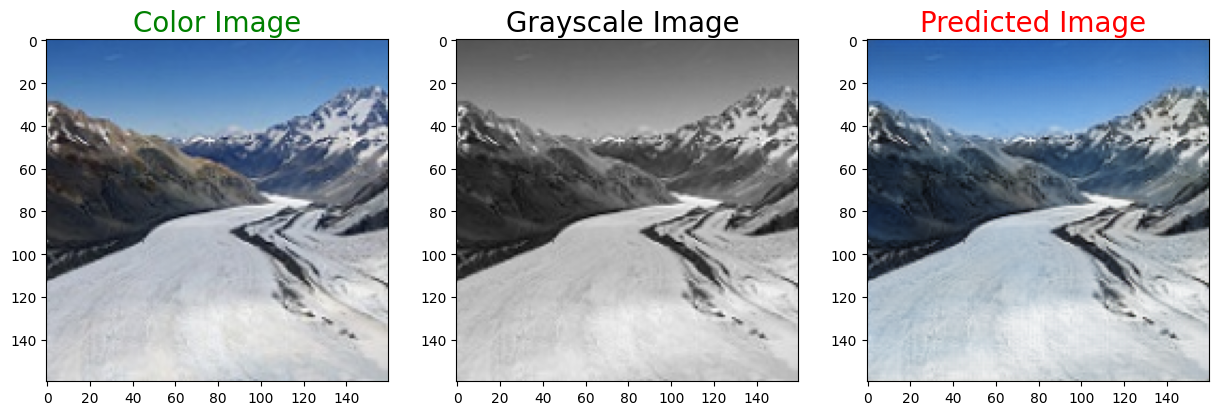

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


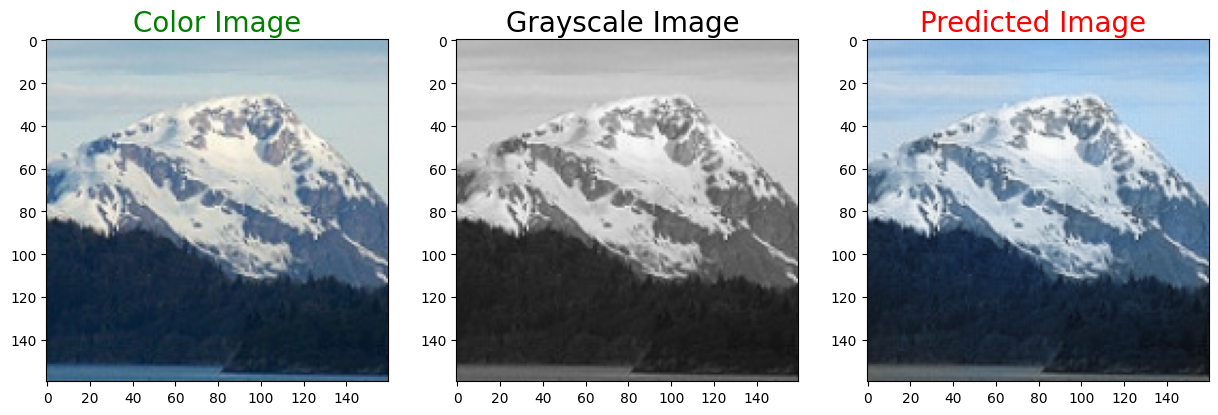

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


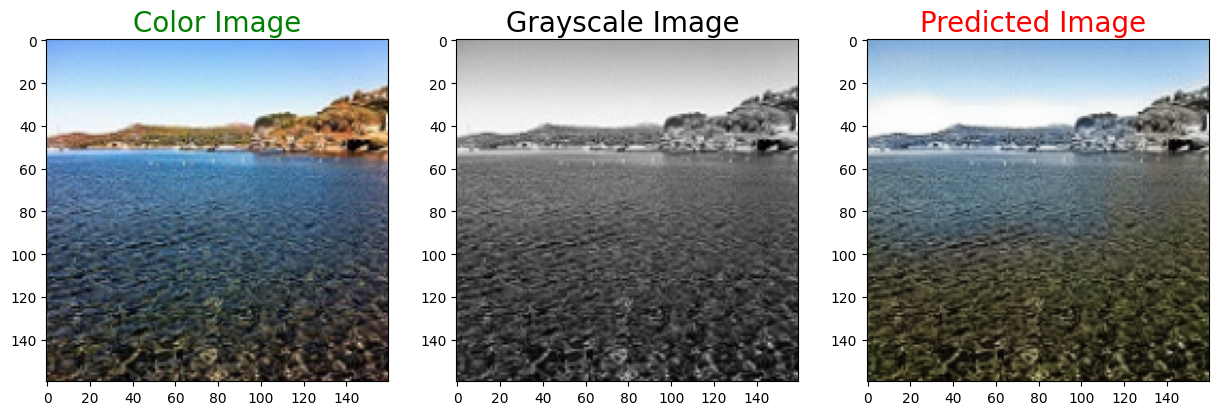

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


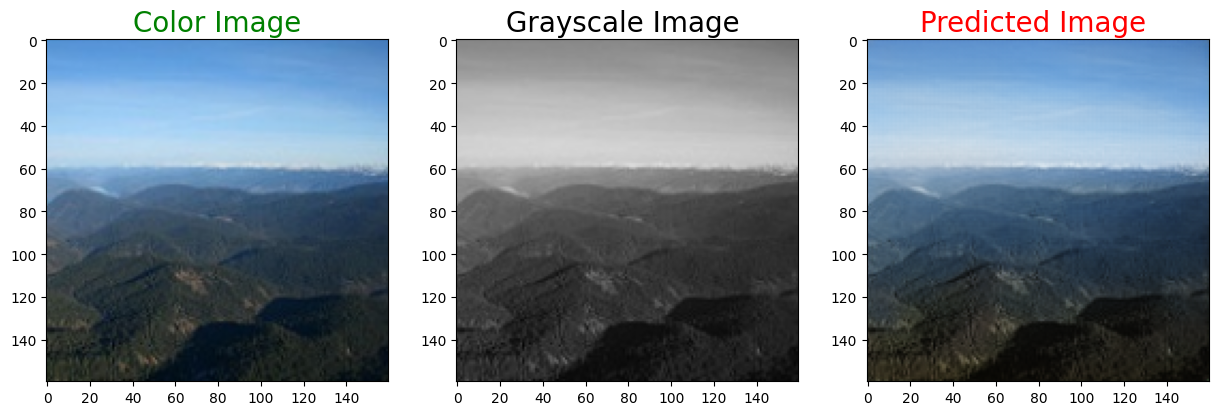

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


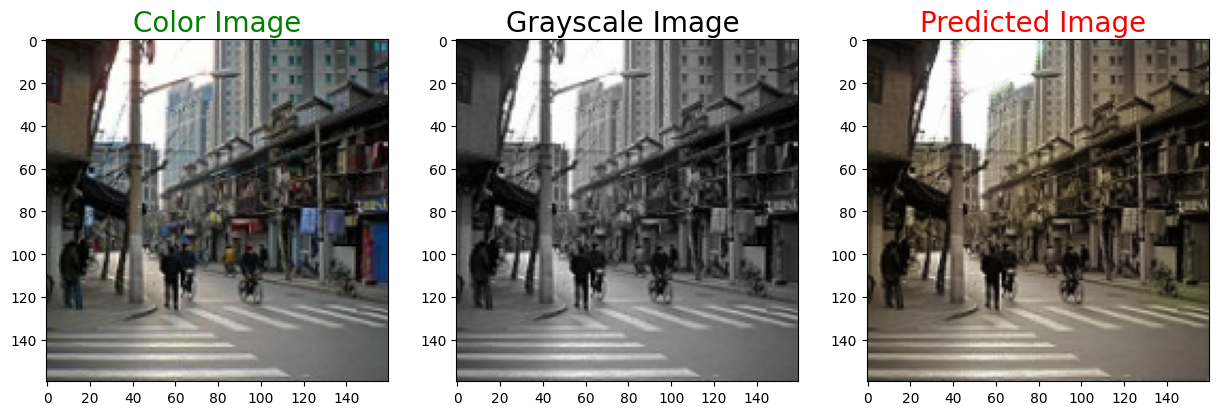

In [ ]:
def plot_images(color,grayscale,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)

    plt.show()

for i in range(50,58):
    predicted = np.clip(model.predict(test_gray_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_color_image[i],test_gray_image[i],predicted)

In [ ]:
model.save('EutoEncoderWithKeras.h5')
